![Insper](https://github.com/danielscarvalho/Insper-DS-Dicas/blob/master/Insper-Logo.png?raw=true)

# Insper Pós-Graduação
## Programa Avançado em Data Science e Decisão [»](https://www.insper.edu.br/pos-graduacao/programas-avancados/data-science-e-decisao/)

# PADSW04 - Checkpoint de aprendizagem

<img src="https://s2.glbimg.com/yRAg4neotKdKHDgjKDStFucWDfw=/0x0:5278x3519/984x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2020/I/z/geO9zzSuA9FkloAFqTHg/000-8vd68k.jpg" width="500"/>

<p style="text-align:center;">Imagem: https://bit.ly/3sxlQfQ</p>


Esta prática faz uso de *dados reais* disponibilizados no repositório : https://github.com/wcota/covid19br/blob/master/DESCRIPTION.md 

Ele contém a série histórica de casos de COVID-19 no Brasil. Há arquivos com dados consolidados por estado e outros focados em municípios. Além disso, há arquivos com informações auxiliares sobre os municípios e as fontes de dados. 


### Dados  

Utilizaremos os seguintes arquivos disponibilizados neste repositório:

- `cases-brazil-states.csv` - série histórica completa de casos de COVID-19 no Brasil por estado
- `cases-brazil-cities.csv` - dados de COVID-19 no Brasil por município, do último dia disponível 
- `cities_info.csv` - informações adicionais sobre o município, como população, se o local é região metropolitana, etc
- `gps_cities.csv` - coordenadas GPS de cada município

Você não precisa baixar os dados, pode consumi-los online por meio de comandos como: 

```python
    import pandas as pd 
    df = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")
```

_DICA_ : acesse o repositório para conhecer o Dicionário das Variáveis! 


### Exercícios 

Você tem algumas tarefas a serem realizadas:

1. Considerando o arquivo `cases-brazil-states.csv`, responda: 

    a. [**0,25 ponto**] Quantas linhas e colunas ele possui? 
    
    b. [**0,25 ponto**] Quais são os tipos de dados das variáveis? 
    
    c. [**0,25 ponto**] Obtenha estatísticas básicas sobre estes dados (valores médios, mínimos, máximos, etc). Todos os números fazem sentido?
    
    d. [**0,25 ponto**] Converta a coluna `date` para o formato `DateTime`
    

2. Considerando o arquivo `cases-brazil-cities.csv`, responda: 

    a. [**1 ponto**] Quantas cidades _distintas_ existem? 
    
    b. [**1 ponto**] O arquivo lista os casos por município no último dia. Obtenha por meio de manipulação deste arquivo um DataFrame com o número de casos e de mortes por estado 
    
    
3. [**1 ponto**] Na data de 25/fevereiro/2021, quais são os TOP10 estados com mais imunizados? Lembre-se: só está imunizado quem tomou a 2ª dose da vacina. 

4. [**2 pontos**] Encontre as TOP5 cidades do seu estado com o menor índice de mortalidade de COVID-19. 

5. [**2 pontos**] A partir das TOP5 cidades encontradas no _item 4._ , construa um dataframe com informações sobre este município (inclua as colunas: `código IBGE, nome completo, latitude, longitude, população 2020, indicação se a cidade é região metropolitana ou não`)

6. [**2 pontos**] Faça um gráfico que mostre a evolução histórica de novos casos nos últimos 7 dias, comparando o TOTAL do Brasil com o TOTAL do estado de RJ, na mesma imagem 



### Data de entrega

Estes exercícios devem ser feitos em sala de aula, com entrega via BlackBoard até às 18h. IMPORTANTE: renomeie o notebook incluindo seu nome!

Em caso de dúvidas, chame o professor. Consultas aos materiais/Internet são permitidas. Bom trabalho! 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df_state = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")
df_city = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities.csv")
df_ctInfo = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cities_info.csv")
df_gps = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/gps_cities.csv")

In [3]:
df_state.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_city.head()

,country,state,city,ibgeID,deaths,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,date,newCases,newDeaths,last_info_date
0,Brazil,GO,Abadia de Goiás/GO,5200050,50,4074,545.97074,44485.69557,0.01227,MS,2023-03-18,5,0,2023-03-18
1,Brazil,MG,Abadia dos Dourados/MG,3100104,21,1943,299.06010,27670.17944,0.01081,MS,2023-03-18,0,0,2023-03-18
2,Brazil,GO,Abadiânia/GO,5200100,55,2218,263.49830,10626.16778,0.02480,MS,2023-03-18,-1,0,2023-03-18
3,Brazil,PA,Abaetetuba/PA,1500107,244,12009,152.08272,7485.08779,0.02032,MS,2023-03-18,13,0,2023-03-18
4,Brazil,MG,Abaeté/MG,3100203,51,4279,219.23226,18394.01625,0.01192,MS,2023-03-18,0,0,2023-03-18


In [5]:
df_ctInfo.head()

,ibge,city,state,region,pop2019,pop2020,pop2021,isCountryside,cod_RegiaoDeSaude,name_RegiaoDeSaude,ibge_id
0,2600054,Abreu e Lima/PE,PE,Nordeste,99990,100346,100698,0,26010,Recife,2600054
1,2600104,Afogados da Ingazeira/PE,PE,Nordeste,37259,37404,37546,1,26001,Afogados da Ingazeira,2600104
2,2600203,Afrânio/PE,PE,Nordeste,19635,19810,19981,1,26009,Petrolina,2600203
3,2600302,Agrestina/PE,PE,Nordeste,24885,25065,25240,1,26003,Caruaru,2600302
4,2600401,Água Preta/PE,PE,Nordeste,36771,37082,37386,1,26008,Palmares,2600401


In [6]:
df_gps.head()

,ibgeID,id,lat,lon,longName
0,2600054.0,Abreu e Lima/PE,-7.900719,-34.898389,"Abreu e Lima, Região Geográgica Imediata do Re..."
1,2600104.0,Afogados da Ingazeira/PE,-7.750429,-37.635638,"Afogados da Ingazeira, Microrregião de Pajeú, ..."
2,2600203.0,Afrânio/PE,-8.519892,-41.007020,"Afrânio, Região Geográfica Imediata de Petroli..."
3,2600302.0,Agrestina/PE,-8.455802,-35.944266,"Agrestina, Região Geográfica Imediata de Carua..."
4,2600401.0,Água Preta/PE,-8.707911,-35.519859,"Água Preta, Microrregião da Mata Meridional Pe..."


## 1
___

### A

In [7]:
num_linhas, num_colunas = df_state.shape
print(f"Número de linhas: {num_linhas}")
print(f"Número de colunas: {num_colunas}")

Número de linhas: 30842
Número de colunas: 26


### B

In [8]:
print(df_state.dtypes)

epi_week                                   int64
date                                      object
country                                   object
state                                     object
city                                      object
newDeaths                                  int64
deaths                                     int64
newCases                                   int64
totalCases                                 int64
deathsMS                                   int64
totalCasesMS                               int64
deaths_per_100k_inhabitants              float64
totalCases_per_100k_inhabitants          float64
deaths_by_totalCases                     float64
recovered                                float64
suspects                                 float64
tests                                    float64
tests_per_100k_inhabitants               float64
vaccinated                               float64
vaccinated_per_100_inhabitants           float64
vaccinated_second   

### C

In [9]:
print(df_state.describe())

           epi_week     newDeaths         deaths       newCases    totalCases  \
count  30842.000000  30842.000000   30842.000000   30842.000000  3.084200e+04   
mean     146.739446     45.347902   32058.683873    2404.871279  1.395334e+06   
std       87.895637    187.855717   96880.393547    9104.676302  4.339018e+06   
min        9.000000    -43.000000       0.000000  -19581.000000  1.000000e+00   
25%       50.000000      1.000000    2627.000000      83.000000  1.479220e+05   
50%      137.000000      6.000000    8429.500000     450.000000  3.774810e+05   
75%      224.000000     23.000000   20850.500000    1433.750000  9.398152e+05   
max      311.000000   4146.000000  699310.000000  285396.000000  3.708552e+07   

            deathsMS  totalCasesMS  deaths_per_100k_inhabitants  \
count   30842.000000  3.084200e+04                 30842.000000   
mean    32052.913430  1.395038e+06                   207.608601   
std     96872.497689  4.338608e+06                   126.552746   
mi

___
Analise dos dados:
* Nem todos os valores fazem sentido, como podemos ver temos um número negativo no valor mínimo da variável "newCases", o que não faz muito sentido. O mesmo vale para "newDeaths

### D

In [10]:
df_state['date'].dtype

dtype('O')

In [12]:
# Converter a coluna 'date' para o formato DateTime
df_state['date'] = pd.to_datetime(df_state['date'])

df_state['date'].dtype


dtype('<M8[ns]')

In [13]:
df_state['date']

0       2020-02-25
1       2020-02-25
2       2020-02-26
3       2020-02-26
4       2020-02-27
           ...    
30837   2023-03-18
30838   2023-03-18
30839   2023-03-18
30840   2023-03-18
30841   2023-03-18
Name: date, Length: 30842, dtype: datetime64[ns]

## 2
___

### A

In [14]:
df_city["city"].describe()

count                   5596
unique                  5596
top       Abadia de Goiás/GO
freq                       1
Name: city, dtype: object

In [15]:
distinct_cities = df_city['city'].nunique()

print(f"Total de cidades distintas: {distinct_cities}")

Total de cidades distintas: 5596


### B

In [16]:
df_city.columns

Index(['country', 'state', 'city', 'ibgeID', 'deaths', 'totalCases',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', '_source', 'date', 'newCases', 'newDeaths',
       'last_info_date'],
      dtype='object')

In [17]:
dfCt = df_city.groupby('state').agg({'totalCases': 'sum', 'deaths': 'sum'}).reset_index()
print(dfCt)

   state  totalCases  deaths
0     AC      160452    2043
1     AL      337568    7242
2     AM      631976   14443
3     AP      185673    2167
4     BA     1792572   31459
5     CE     1453417   28157
6     DF      898072   11845
7     ES     1323595   15041
8     GO     1900459   28041
9     MA      493418   11053
10    MG     4189760   65507
11    MS      607776   11016
12    MT      879415   15090
13    PA      872068   19025
14    PB      707854   10542
15    PE     1157160   22687
16    PI      424866    8354
17    PR     2920177   46022
18    RJ     2754359   76852
19    RN      585935    8715
20    RO      482910    7432
21    RR      182505    2180
22    RS     2962414   41921
23    SC     1986447   22703
24    SE      359692    6502
25    SP     6469442  179039
26    TO      365538    4232


## 3
___

In [18]:
df_state.columns

Index(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'],
      dtype='object')

In [19]:
df_filtrado = df_state[(df_state['date'] == '2021-02-25') & df_state['vaccinated_second'] != "NaN"]

df_imunizados = df_filtrado.groupby('state')['vaccinated_second'].sum().reset_index()

top10_estados = df_imunizados.sort_values(by='vaccinated_second', ascending=False).head(10+1)
top10_estados["posição"] = list(range(0,11))
print(top10_estados)

    state  vaccinated_second  posição
27  TOTAL       8.878114e+10        0
25     SP       2.203373e+10        1
10     MG       9.020900e+09        2
18     RJ       7.037829e+09        3
4      BA       5.662472e+09        4
17     PR       5.078278e+09        5
22     RS       5.016714e+09        6
5      CE       4.018248e+09        7
15     PE       3.944089e+09        8
13     PA       3.333015e+09        9
23     SC       3.075077e+09       10


## 4
___

In [20]:
df_city.columns

Index(['country', 'state', 'city', 'ibgeID', 'deaths', 'totalCases',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', '_source', 'date', 'newCases', 'newDeaths',
       'last_info_date'],
      dtype='object')

Como o exercício pede o indice de mortatlidade por Covid-19, uttilizarei a metrica deaths_by_totalCases, que indica as mortes com base nos casos totais.

Assim sendo creio ser uma boa métrica para avaliar qual estado conseguiu se virar melhor com os casos de covid, uma vez que cada estado é de tamanho distinto
podendo assim ter mais ou menos numero de casos brutos e desta forma maior ou menor número de mortes brutas.

In [21]:
df_filtrado = df_city[(df_city['state'] == 'SP')]

df_imunizados = df_filtrado.groupby('city')['deaths_by_totalCases'].sum().reset_index()
df_imunizados = df_imunizados[(df_imunizados["deaths_by_totalCases"] != 0)] #retirando valores nulos

top5_cidades = df_imunizados.sort_values(by='deaths_by_totalCases', ascending=True).head(5)

top5_cidades["posição"] = list(range(1,5+1))
print(top5_cidades)

                      city  deaths_by_totalCases  posição
464             Queiroz/SP               0.00283        1
283           Jeriquara/SP               0.00464        2
370  Nova Independência/SP               0.00474        3
46             Balbinos/SP               0.00491        4
212            Holambra/SP               0.00594        5


## 5
___

In [22]:
top5 = top5_cidades["city"]
top5

464               Queiroz/SP
283             Jeriquara/SP
370    Nova Independência/SP
46               Balbinos/SP
212              Holambra/SP
Name: city, dtype: object

In [23]:
df_top5_cities = df_city[df_city['city'].isin(top5)]
df_top5_ctInfo = df_ctInfo[df_ctInfo['city'].isin(top5)]
df_top5_gps = df_gps[df_gps['id'].isin(top5)]

In [24]:
df_top5_cities.head()

,country,state,city,ibgeID,deaths,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,date,newCases,newDeaths,last_info_date
425,Brazil,SP,Balbinos/SP,3504701,4,814,65.28480,13285.45781,0.00491,MS,2023-03-18,0,0,2023-03-18
2053,Brazil,SP,Holambra/SP,3519055,23,3873,147.38866,24818.96828,0.00594,MS,2023-03-18,1,0,2023-03-18
2563,Brazil,SP,Jeriquara/SP,3525409,3,647,95.45021,20585.42794,0.00464,MS,2023-03-18,0,0,2023-03-18
3321,Brazil,SP,Nova Independência/SP,3533205,8,1687,193.47037,40798.06530,0.00474,MS,2023-03-18,9,0,2023-03-18
4061,Brazil,SP,Queiroz/SP,3541802,3,1061,85.39710,30202.10646,0.00283,MS,2023-03-18,0,0,2023-03-18


In [25]:
df_top5_ctInfo.head()

,ibge,city,state,region,pop2019,pop2020,pop2021,isCountryside,cod_RegiaoDeSaude,name_RegiaoDeSaude,ibge_id
3769,3504701,Balbinos/SP,SP,Sudeste,5735,5934,6127,1,35062,Bauru,3504701
3918,3519055,Holambra/SP,SP,Sudeste,14930,15272,15605,1,35072,Região Metropolitana de Campinas,3519055
3985,3525409,Jeriquara/SP,SP,Sudeste,3159,3151,3143,1,35081,Três Colinas,3525409
4068,3533205,Nova Independência/SP,SP,Sudeste,3969,4053,4135,1,35022,Lagos do DRS II,3533205
4160,3541802,Queiroz/SP,SP,Sudeste,3406,3460,3513,1,35095,Tupã,3541802


In [26]:
df_top5_gps.head()

,ibgeID,id,lat,lon,longName
3769,3504701.0,Balbinos/SP,-21.900625,-49.358397,"Balbinos, Região Imediata de Bauru, Pirangueir..."
3918,3519055.0,Holambra/SP,-22.633203,-47.054530,"Holambra, Região Imediata de Campinas, Região ..."
3985,3525409.0,Jeriquara/SP,-20.310477,-47.591567,"Jeriquara, Região Imediata de Franca, Região I..."
4068,3533205.0,Nova Independência/SP,-21.106654,-51.491080,"Nova Independência, Região Imediata de Andradi..."
4160,3541802.0,Queiroz/SP,-21.799141,-50.239279,"Queiroz, Região Imediata de Tupã, Região Inter..."


In [27]:
df_merged = pd.merge(df_top5_cities, df_top5_ctInfo, left_on='ibgeID', right_on='ibge', how='inner')
df_merged = pd.merge(df_merged, df_top5_gps, left_on='ibgeID', right_on='ibgeID', how='inner')

df_top5 = pd.DataFrame()
df_top5["Cidade"] = df_merged["city_x"]  
df_top5["Código IBGE"] = df_merged["ibgeID"]
df_top5["Nome Completo"] = df_merged["longName"]
df_top5["Latitude"] = df_merged["lat"]
df_top5["Longitude"] = df_merged["lon"]
df_top5["População 2020"] = df_merged["pop2020"]
df_top5["Metropolitana"] = df_merged["isCountryside"].apply(lambda x: "Não" if x == 1 else "Sim")

df_top5

,Cidade,Código IBGE,Nome Completo,Latitude,Longitude,População 2020,Metropolitana
0,Balbinos/SP,3504701,"Balbinos, Região Imediata de Bauru, Pirangueir...",-21.900625,-49.358397,5934,Não
1,Holambra/SP,3519055,"Holambra, Região Imediata de Campinas, Região ...",-22.633203,-47.054530,15272,Não
2,Jeriquara/SP,3525409,"Jeriquara, Região Imediata de Franca, Região I...",-20.310477,-47.591567,3151,Não
3,Nova Independência/SP,3533205,"Nova Independência, Região Imediata de Andradi...",-21.106654,-51.491080,4053,Não
4,Queiroz/SP,3541802,"Queiroz, Região Imediata de Tupã, Região Inter...",-21.799141,-50.239279,3460,Não


## 6
___

In [28]:
df_state['date'] = pd.to_datetime(df_state['date'])

# Filtrar os últimos 7 dias
ultimo_dia = df_state['date'].max() 
ultimos_7_dias = pd.date_range(end=ultimo_dia, periods=7)


filtro_7_dias = df_state[df_state['date'].isin(ultimos_7_dias)]
filtro_7_dias = filtro_7_dias[["date","state","totalCases","newCases"]].copy()
filtro_7_dias

,date,state,totalCases,newCases
30646,2023-03-12,AC,160452,0
30647,2023-03-12,AL,337568,0
30648,2023-03-12,AM,631976,0
30649,2023-03-12,AP,185673,0
30650,2023-03-12,BA,1792572,0
...,...,...,...,...
30837,2023-03-18,SC,1986447,0
30838,2023-03-18,SE,359692,0
30839,2023-03-18,SP,6469442,0
30840,2023-03-18,TO,365538,0


In [29]:
filtro_7_dias.columns

Index(['date', 'state', 'totalCases', 'newCases'], dtype='object')

In [30]:
totalCases_Brazil = filtro_7_dias[["date", "totalCases"]].copy()
totalCases_RJ = filtro_7_dias[filtro_7_dias['state'] == "RJ"][["date", "totalCases"]].copy()

newCases_Brazil = filtro_7_dias[["date", "newCases"]].copy()
newCases_RJ = filtro_7_dias[filtro_7_dias['state'] == "RJ"][["date", "newCases"]].copy()


totalCases_Brazil = totalCases_Brazil.groupby('date', as_index=False).agg({'totalCases': 'sum'})
totalCases_RJ = totalCases_RJ.groupby('date', as_index=False).agg({'totalCases': 'sum'})

newCases_Brazil = newCases_Brazil.groupby('date', as_index=False).agg({'newCases': 'sum'})
newCases_RJ = newCases_RJ.groupby('date', as_index=False).agg({'newCases': 'sum'})

ultilizei a variavel totalCasesMS pois a newCases consta sempre como zero

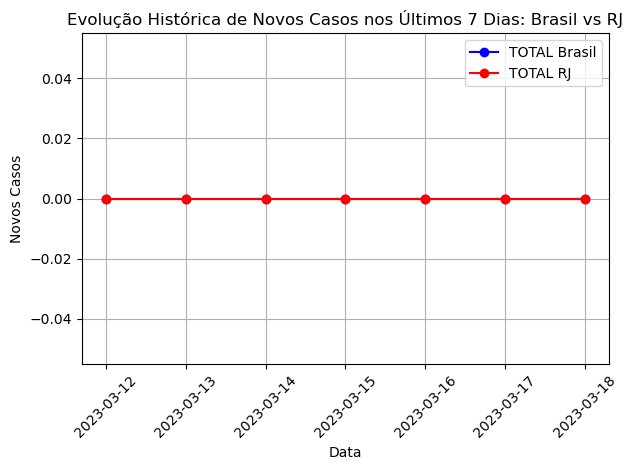

In [31]:
# Plotar os novos casos do Brasil
plt.plot(newCases_Brazil['date'], newCases_Brazil['newCases'], marker='o', label='TOTAL Brasil', color='blue')

# Plotar os novos casos do RJ
plt.plot(newCases_RJ['date'], newCases_RJ['newCases'], marker='o', label='TOTAL RJ', color='red')

# Adicionar título e rótulos
plt.title('Evolução Histórica de Novos Casos nos Últimos 7 Dias: Brasil vs RJ')
plt.xlabel('Data')
plt.ylabel('Novos Casos')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

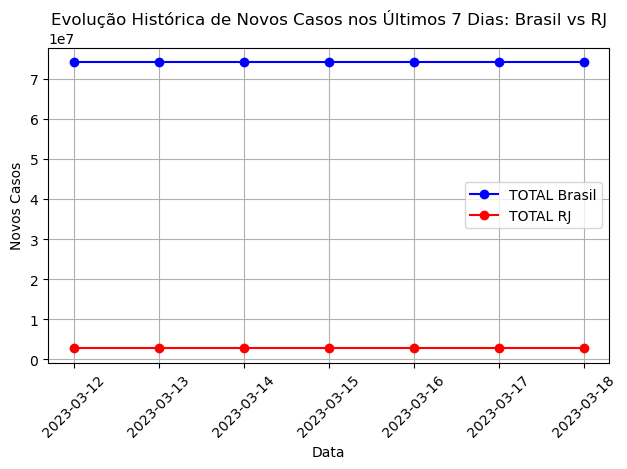

In [32]:


# Plotar os novos casos do Brasil
plt.plot(totalCases_Brazil['date'], totalCases_Brazil['totalCases'], marker='o', label='TOTAL Brasil', color='blue')

# Plotar os novos casos do RJ
plt.plot(totalCases_RJ['date'], totalCases_RJ['totalCases'], marker='o', label='TOTAL RJ', color='red')

# Adicionar título e rótulos
plt.title('Evolução Histórica de Novos Casos nos Últimos 7 Dias: Brasil vs RJ')
plt.xlabel('Data')
plt.ylabel('Novos Casos')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

Como podemos notar, realmente não houve novos casos nos ultimos 7 dias medidos, decidi plotar o gráfico dos valores totais pois não há muito sentindo em plotar um grafico 
onde as variaveis no eixo y sejam nulas, os dois gráficos conseguem reprensetar bem o que desejamos saber: Não houve novos casos nos ultimos 7 dias

![Força](https://github.com/danielscarvalho/Insper-DS-Dicas/blob/master/img/for%C3%A7a.jpg?raw=true)